In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score,confusion_matrix

In [2]:
sales_data = pd.read_csv('SalaryData_Train(1).csv')
sales_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
for col in sales_data.columns:
    print(sales_data[col].value_counts())

36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
85      3
88      3
86      1
Name: age, Length: 72, dtype: int64
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64
 Married-civ-spouse       14065
 Never-marrie

In [5]:
sales_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
sales_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
features = ['workclass', 'education','maritalstatus','occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
def label_encoder(data,label):
    le = LabelEncoder()
    data[label] = le.fit_transform(data[label])
for i in features:
    label_encoder(sales_data,i)

In [8]:
sales_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


### Model building

In [9]:
X_train = sales_data.iloc[:,:-1]
y_train = sales_data.iloc[:,-1:]

In [10]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X_train)
X_train = pd.DataFrame(data = scaled_X,columns=X_train.columns)
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.042779,2.935947,-0.349827,1.128898,0.947877,-1.479030,-0.261233,0.385055,0.692771,0.146085,-0.218508,-0.077735,0.266358
1,0.880261,1.887645,-0.349827,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-2.331495,0.266358
2,-0.033356,-0.208958,0.174805,-0.439733,-1.722362,-0.238202,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
3,1.108665,-0.208958,-2.448354,-1.224048,-0.387243,-0.238202,-0.885712,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358
4,-0.794703,-0.208958,-0.349827,1.128898,-0.387243,0.754461,2.236683,-2.010994,-1.443479,-0.147447,-0.218508,-0.077735,-5.273965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,-0.208958,-0.874459,0.736740,-0.387243,1.498958,2.236683,0.385055,-1.443479,-0.147447,-0.218508,-0.244681,0.266358
30157,0.118914,-0.208958,0.174805,-0.439733,-0.387243,0.009964,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
30158,1.489339,-0.208958,0.174805,-0.439733,2.282996,-1.479030,1.612204,0.385055,-1.443479,-0.147447,-0.218508,-0.077735,0.266358
30159,-1.251511,-0.208958,0.174805,-0.439733,0.947877,-1.479030,0.987725,0.385055,0.692771,-0.147447,-0.218508,-1.747187,0.266358


### Preparing test datasets

In [11]:
sales_test_data = pd.read_csv('SalaryData_Test(1).csv')
sales_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [12]:
def label_encoder(data,label):
    le = LabelEncoder()
    data[label] = le.fit_transform(data[label])
for i in features:
    label_encoder(sales_test_data,i)

In [13]:
sales_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


#### building test data

In [14]:
X_test = sales_test_data.iloc[:,:-1]
y_test = sales_test_data.iloc[:,-1:]

In [15]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X_test)
X_test = pd.DataFrame(data = scaled_X,columns=X_test.columns)
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.029005,-0.222347,-2.423439,-1.216563,0.933187,0.002725,1.006108,-2.034389,0.695832,-0.145438,-0.219169,-0.078889,0.260581
1,-0.057423,-0.222347,0.190172,-0.434898,-0.395463,-0.494789,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
2,-0.804794,-1.257126,-0.855272,0.737599,-0.395463,0.997755,-0.881990,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
3,0.391000,-0.222347,1.235617,-0.044066,-0.395463,0.002725,-0.881990,-2.034389,0.695832,0.852624,-0.219169,-0.078889,0.260581
4,-0.356371,-0.222347,-2.684800,-1.607395,0.933187,0.251483,-0.252624,0.382230,0.695832,-0.145438,-0.219169,-0.907909,0.260581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,-0.222347,-0.332550,1.128431,0.933187,0.748998,1.006108,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
15056,0.017315,-0.222347,-0.332550,1.128431,-1.724114,0.748998,-0.252624,0.382230,-1.437128,-0.145438,-0.219169,-0.410497,0.260581
15057,-0.057423,-0.222347,-0.332550,1.128431,-0.395463,0.748998,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
15058,0.391000,-0.222347,-0.332550,1.128431,-1.724114,-1.489819,1.006108,-3.242699,0.695832,0.562734,-0.219169,-0.078889,0.260581


### Model testing and training

Accuracy   :  0.846547144754316
Precision  :  0.7592385218365062
Recall     :  0.5497297297297298
AUC        :  0.7464757803578226


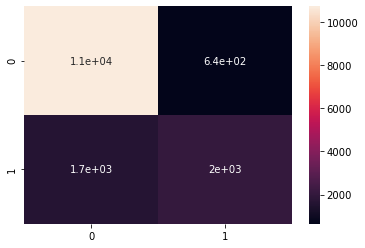

CPU times: user 43.1 s, sys: 16 ms, total: 43.1 s
Wall time: 43.2 s


In [36]:
%%time
svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)
y_pred_test = svm_classifier.predict(X_test)
print('Accuracy   : ',accuracy_score(y_test,y_pred_test))
print('Precision  : ',precision_score(y_test,y_pred_test))
print('Recall     : ',recall_score(y_test,y_pred_test))
print('AUC        : ',roc_auc_score(y_test,y_pred_test))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf,annot=True)
plt.show()

In [17]:
y_train.value_counts()

Salary
0         22653
1          7508
dtype: int64

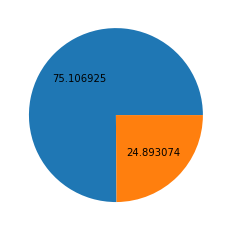

In [18]:
plt.pie(x = y_train.Salary.value_counts(),autopct='%2f')
plt.show()

### TUNE SVM MODEL USING GridSearchCV

In [25]:
%%time
grid_cv = GridSearchCV(estimator=svm_classifier, param_grid={
    'degree': range(1,5),
    'C':range(1,6)
})
grid_cv.fit(X_train,y_train)

CPU times: user 36min 18s, sys: 1.65 s, total: 36min 20s
Wall time: 36min 23s


GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 6), 'degree': range(1, 5)})

In [26]:
grid_cv.best_params_

{'C': 4, 'degree': 1}

In [40]:
grid_cv.best_score_

0.8457944226735273

Accuracy   :  0.8462815405046481
Precision  :  0.7517266448564158
Recall     :  0.5589189189189189
AUC        :  0.7493978397411497


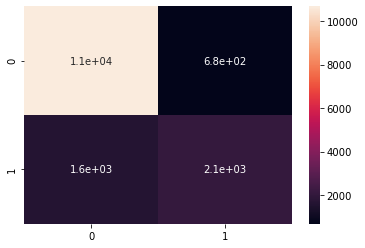

CPU times: user 43.9 s, sys: 28 ms, total: 43.9 s
Wall time: 44 s


In [41]:
%%time
svm_classifier = SVC(kernel='rbf',C = 4,degree=1)
svm_classifier.fit(X_train,y_train)
y_pred_test = svm_classifier.predict(X_test)
print('Accuracy   : ',accuracy_score(y_test,y_pred_test))
print('Precision  : ',precision_score(y_test,y_pred_test))
print('Recall     : ',recall_score(y_test,y_pred_test))
print('AUC        : ',roc_auc_score(y_test,y_pred_test))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf,annot=True)
plt.show()